# Modelos de ML

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# Lendo a base de dados com as variáveis dummies

dados = pd.read_csv('../../dados/dados_OneHotEncoder.csv')
dados.head()

,usableAreas,bedrooms,bathrooms,parkingSpaces,suites,yearlyIptu,monthlyCondoFee,price,unitTypes_APARTMENT,unitTypes_BUILDING,...,unitTypes_KITNET,unitTypes_LOFT,unitTypes_PENTHOUSE,unitTypes_RESIDENTIAL_ALLOTMENT_LAND,unitTypes_RESIDENTIAL_BUILDING,unitTypes_TWO_STORY_HOUSE,unitTypes_VILLAGE_HOUSE,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,5.017280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.160804,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.761200,1.098612,0.693147,0.000000,0.000000,4.615121,5.993961,9.825580,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.871201,1.098612,1.098612,0.000000,0.693147,5.247024,6.214608,9.680406,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.761200,1.098612,0.693147,0.000000,0.000000,4.615121,5.993961,9.705098,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.737670,1.098612,0.693147,0.693147,0.000000,0.000000,0.000000,9.852247,1,0,...,0,0,0,0,0,0,0,0,1,0


## Dividindo em treino e teste

In [3]:
X = dados.drop('price', axis=1)
y = dados['price']

In [4]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, )

## Regressão linear

In [5]:
import statsmodels.api as sm

X_train_constante = sm.add_constant(X_train)
X_train_constante

/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,const,usableAreas,bedrooms,bathrooms,parkingSpaces,suites,yearlyIptu,monthlyCondoFee,unitTypes_APARTMENT,unitTypes_BUILDING,...,unitTypes_KITNET,unitTypes_LOFT,unitTypes_PENTHOUSE,unitTypes_RESIDENTIAL_ALLOTMENT_LAND,unitTypes_RESIDENTIAL_BUILDING,unitTypes_TWO_STORY_HOUSE,unitTypes_VILLAGE_HOUSE,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
919,1.0,3.891820,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,0,0,0,0,0,1,0,0
55028,1.0,6.908755,1.609438,1.609438,1.609438,1.609438,7.601402,7.666222,0,0,...,0,0,0,0,0,0,0,0,1,0
7555,1.0,4.465908,1.098612,0.693147,0.693147,1.098612,7.117206,6.741701,1,0,...,0,0,0,0,0,0,0,0,1,0
26610,1.0,5.003946,1.386294,1.609438,1.098612,1.098612,0.693147,0.693147,1,0,...,0,0,0,0,0,0,0,0,1,0
9426,1.0,4.709530,1.386294,0.693147,1.098612,0.000000,7.244942,5.860786,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,1.0,5.605802,1.609438,0.693147,1.386294,1.098612,6.498282,7.744570,0,0,...,0,0,1,0,0,0,0,0,1,0
54343,1.0,6.418365,1.609438,2.079442,1.609438,1.609438,9.893488,8.505323,1,0,...,0,0,0,0,0,0,0,0,1,0
38158,1.0,5.398163,1.609438,1.386294,1.098612,0.693147,5.303305,5.860786,0,0,...,0,0,0,0,0,0,0,0,1,0
860,1.0,5.579730,0.000000,0.000000,0.000000,0.000000,0.000000,4.852030,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
import statsmodels.api as sm

X_train_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst=True).fit()
print(modelo_statsmodels.summary)

/home/bruno/anaconda3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f69cb28cca0>>


In [8]:
# step wise regression -> Sugestão do João

modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     6783.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:40:55   Log-Likelihood:                -20007.
No. Observations:               38615   AIC:                         4.006e+04
Df Residuals:                   38590   BIC:                         4.028e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [9]:
reg_linear = LinearRegression(n_jobs=-1).fit(X_train, y_train)

Criando uma função para obter as métricas dos modelos de regressão como um DataFrame.

In [10]:
# Criando um dicionário com as métricas para usar em um dataframe

def df_metrics_regression(modelo, X_test, y_test):
    mae = metrics.mean_absolute_error(y_test, modelo.predict(X_test))
    mse = metrics.mean_squared_error(y_test, modelo.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, modelo.predict(X_test))
    return pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'R2': [r2]})

In [11]:
metricas_reg_linear = df_metrics_regression(reg_linear, X_test, y_test)
metricas_reg_linear

,MAE,MSE,RMSE,R2
0,0.309014,0.168874,0.410943,0.805057


## Regressor da Árvore de Decisão


Vamos utilizar a validação cruzada para avaliarmos obtermos um valor mais generalista para o nosso modelo.

A utilização do KFold com shuffle foi nescessária pois o conjunto de dados está ordernado em ordem crescente de preço e ao fazer a validação cruzada há problemas pois a parte utilzada para teste não aprendeu a generalizar para aquele fold.

A métrica padrão retornada pelo `.DecisionTreeRegressor()` é o R2.

<AxesSubplot:ylabel='price'>

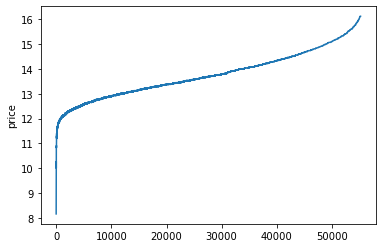

In [12]:
import seaborn as sns
sns.lineplot(y=y,x=y.index)

In [11]:
from sklearn.model_selection import KFold

regressor = DecisionTreeRegressor(random_state=SEED, max_depth=3)
cross_val_score(regressor, X, y, cv=5)

array([ -6.09979016, -13.53397417, -13.22732151, -10.16344499,
        -9.02142035])

In [14]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

regressor = DecisionTreeRegressor(random_state=SEED, max_depth=3)
cross_val_score(regressor, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_error').mean()

-0.28837169262299056

Ou seja, dividindo o conjunto de dados em 5 folds e calculando a média dos resultados do R2 obtemos um valor de 0.68.

Vamos analisar como o modelo se comporta para o conjunto de dados separados para teste.

In [13]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

regressor = DecisionTreeRegressor(random_state=SEED, max_depth=3)
cross_val_score(regressor, X, y, cv=kf, scoring = 'neg_root_mean_squared_error').mean()

-0.5349454883307956

In [15]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [16]:
metricas_dt_reg = df_metrics_regression(regressor, X_test, y_test)
metricas_dt_reg

,MAE,MSE,RMSE,R2
0,0.408237,0.28767,0.536349,0.681724


## Regressor de Floresta Aleatória

Realizando a mesma análise para o modelo de árvore aleatória:

In [17]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

rf_reg = RandomForestRegressor(max_depth=3, random_state=SEED)
cross_val_score(rf_reg, X, y, cv=kf).mean()

0.7074251415820962

In [18]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [19]:
metricas_rf_reg = df_metrics_regression(rf_reg, X_test, y_test)
metricas_rf_reg

,MAE,MSE,RMSE,R2
0,0.389545,0.264735,0.514524,0.707099


## Analisando os resultados dos modelos:

In [24]:
metricas_modelos = pd.concat([metricas_reg_linear.T, metricas_dt_reg.T, metricas_rf_reg.T], axis=1)
metricas_modelos.columns = ['Linear Regression', 'Decision Tree', 'Random Forest']
metricas_modelos.head()

,Linear Regression,Decision Tree,Random Forest
MAE,0.315061,0.408237,0.389545
MSE,0.181675,0.287670,0.264735
RMSE,0.426233,0.536349,0.514524
R2,0.798996,0.681724,0.707099


Logo o modelo que apresentou melhor desempenho foi o modelo de regressão linear. 

## Próximos passos:

* Otimização dos hiperparâmetros dos modelos utilizados;
* Testar a biblioteca [PyOD](https://pyod.readthedocs.io/en/latest/) para tratamentos de outliers;
* Testar o [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) para transformação dos dados já que esse é mais robusto a outliers;
* Testamos 3 modelos, mas será que existe algum melhor? fazer uso do [Pycaret](https://pycaret.org/) para testar outros modelos de regressão e entender os modelos utilizados!
* Utilizar métodos ensemble para combinar os modelos de regressão.
* Tentar fazer o deploy do melhor modelo otimizado.
* Criar um README (Em andamento)
